In [452]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from numpy.lib.index_tricks import diag_indices

In [453]:
# spins from -1 to 1

zero = np.array([
0,1,1,1,0,
1,0,0,0,1,
1,0,0,0,1,
1,0,0,0,1,
1,0,0,0,1,
0,1,1,1,0
])

zero = np.where(zero != 0, zero, -1)

one=np.array([
0,1,1,0,0,
0,0,1,0,0,
0,0,1,0,0,
0,0,1,0,0,
0,0,1,0,0,
0,0,1,0,0
])

one = np.where(one != 0, one, -1)

two=np.array([
1,1,1,0,0,
0,0,0,1,0,
0,0,0,1,0,
0,1,1,0,0,
1,0,0,0,0,
1,1,1,1,1,
])

two = np.where(two != 0, two, -1)

noisy0=np.array([
0,1,1,1,0,
1,0,0,0,0,
1,0,0,0,1,
0,0,0,0,0,
0,0,0,0,0,
0,0,1,0,0,
])

noisy0 = np.where(noisy0 != 0, noisy0, -1)

noisy2=np.array([
1,1,1,0,0,
0,0,0,0,0,
0,0,0,0,0,
0,0,1,0,0,
1,0,0,0,0,
1,1,0,0,1,
])

noisy2 = np.where(noisy2 != 0, noisy2, -1)

noisy2b=np.array([
1,1,1,0,0,
0,0,0,1,0,
0,0,0,1,0,
0,0,0,0,0,
0,0,0,0,0,
0,0,0,0,0,
])

noisy2b = np.where(noisy2b != 0, noisy2b, -1)

#   Initialization

time_step = 5

noisy0_copy = noisy0.copy()
noisy1_copy = noisy2.copy()
noisy2_copy = noisy2b.copy()

# Tensor products of our patterns and sum of them

tens0 = np.tensordot(zero, zero, axes = 0)
tens1 = np.tensordot(one, one, axes = 0)
tens2 = np.tensordot(two, two, axes = 0)
tens_sum = tens0 + tens1 + tens2

# Defined diagonal matrix

one_ar = np.ones((30,30))
diag_matrix = np.diag(np.diag(one_ar))

# W matrix calculation

w_matrix = 1/3 * (tens0 + tens1 + tens2) -  diag_matrix  

energy_zero = np.array([])
energy_one = np.array([])
energy_two = np.array([])

time_axis = np.arange(0, time_step, 1)

# Zero pattern

for t in range(time_step):
    a = np.dot(w_matrix, noisy0_copy)
    energy_sum = np.sum(-1/2 * a * noisy0_copy)
    energy_zero = np.append(energy_zero, energy_sum)    # test with sign function
    #a_where_lower = a < 0
    #change_matrix[a_where_lower] = 7
    #noisy0_copy[a_where_lower] = -noisy0_copy[a_where_lower]
    noisy0_copy = np.sign(a)

# One pattern

for t in range(time_step):
    b = np.dot(w_matrix, noisy1_copy)
    energy_sum = np.sum(-1/2 * b * noisy1_copy)
    energy_one = np.append(energy_one, energy_sum) 
    #b_where_lower = b < 0
    #noisy1_copy[b_where_lower] = np.negative(noisy1_copy[b_where_lower])
    noisy1_copy = np.sign(b)

# Two pattern

for t in range(time_step):
    c = np.dot(w_matrix, noisy2_copy)
    energy_sum = np.sum(-1/2 * c * noisy2_copy)
    energy_two = np.append(energy_two, energy_sum) 
    #c_where_lower = c < 0
    #noisy2_copy[c_where_lower] = np.negative(noisy2_copy[c_where_lower])
    noisy2b_copy = np.sign(c)


# Change in energy for noisy0

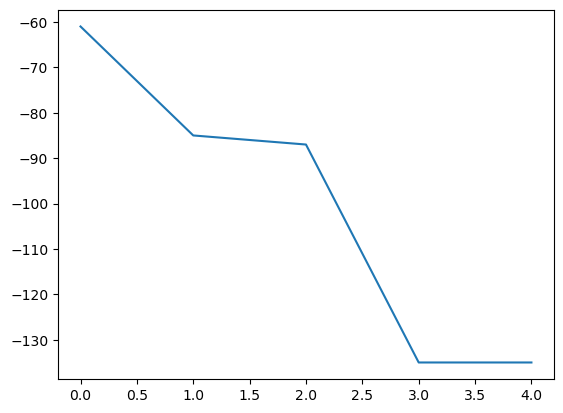

In [454]:
plt.plot(time_axis, energy_zero)
plt.show()

# Result for noisy0 

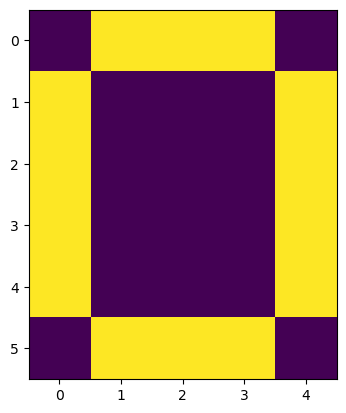

In [455]:

D = np.reshape(noisy0_copy, (-6, 5))
plt.imshow(D)
plt.show()

# Change in energy for noisy1

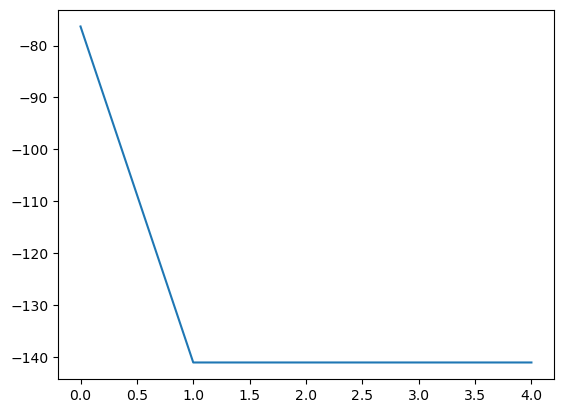

In [456]:
plt.plot(time_axis, energy_one)
plt.show()

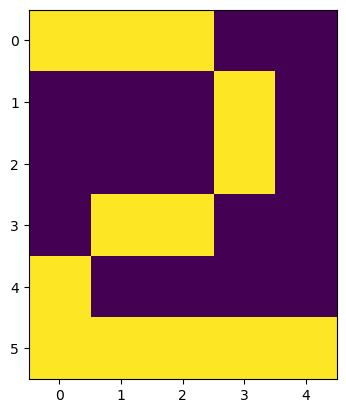

In [457]:

D = np.reshape(noisy1_copy, (-6, 5))
plt.imshow(D)
plt.show()

# Change in energy for noisy2b

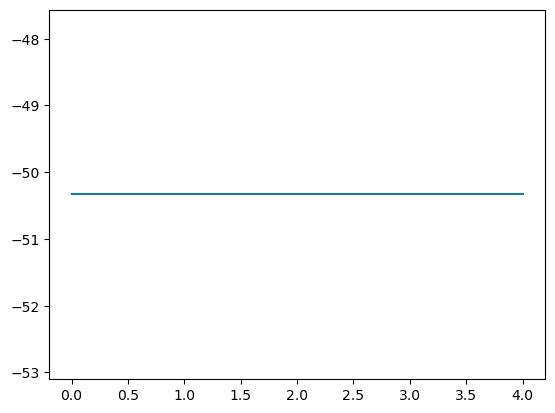

In [458]:
plt.plot(time_axis, energy_two)
plt.show()

# Result for noisy2b

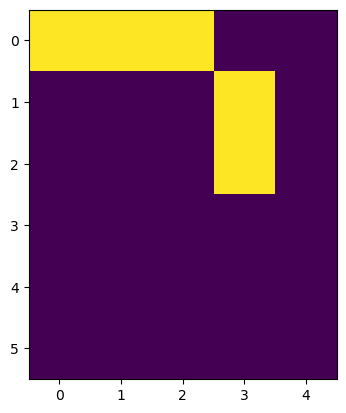

In [459]:

D = np.reshape(noisy2_copy, (-6, 5))
plt.imshow(D)
plt.show()